<a href="https://colab.research.google.com/github/greeningstone/0_mini/blob/master/%EC%A0%9C%EC%A3%BC%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8D%B0%EC%9D%B4%EC%BD%98_%EB%94%B0%EB%9D%BC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Drive와 마운트
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Project Folder 연결
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/dacon'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/dacon


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/dacon


In [4]:
!ls

 201901-202003.csv   202004.csv  'submission (1).csv'


In [5]:
import pandas as pd
train = pd.read_csv("201901-202003.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [6]:
sample_train = train.sample(n=100000, random_state=1)

In [7]:
len(train)

24697792

In [8]:
len(sample_train)

100000

### (1) 시도별 매출 데이터
- 시도별 매출 데이터의 피벗테이블을 작성한다.

In [9]:
pd.pivot_table(sample_train,
               index= 'CARD_SIDO_NM',
               values = 'AMT',
               aggfunc = "sum")

,AMT
CARD_SIDO_NM,
강원,6800701196
경기,58927942770
경남,13539514455
경북,13747206133
광주,7000291372
대구,10143830354
대전,3853454116
부산,19391365400
서울,60509474946


### (2) 업종별 매출 데이터의 피벗 테이블

In [13]:
pd.pivot_table(sample_train,
               index= 'STD_CLSS_NM',
               values = 'AMT',
               aggfunc = "sum")

,AMT
STD_CLSS_NM,
건강보조식품 소매업,412918023
골프장 운영업,2440843989
과실 및 채소 소매업,2514042205
관광 민예품 및 선물용품 소매업,46635993
그외 기타 스포츠시설 운영업,9864600
그외 기타 종합 소매업,4200518544
기타 대형 종합 소매업,29484921901
기타 수상오락 서비스업,5694100
기타 외국식 음식점업,2554112256


### (3) 시도별 - 업종별 매출 데이터의 피벗 테이블

In [14]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [16]:
pivoted = pd.pivot_table(sample_train,                                   
                         index=['CARD_SIDO_NM', 'STD_CLSS_NM'],          
                         values = 'AMT',                               
                         aggfunc="sum")
pivoted\
.sort_values(['CARD_SIDO_NM', 'AMT'], ascending=[True, False])\
.groupby('CARD_SIDO_NM').head(5)\
.reset_index()\
.set_index(['CARD_SIDO_NM','STD_CLSS_NM'])

AMT
CARD_SIDO_NM STD_CLSS_NM               
강원           한식 음식점업        2102349642 
             차량용 주유소 운영업    927264901  
             기타 대형 종합 소매업   687567800  
             체인화 편의점        656639810  
             슈퍼마켓           458135170  
경기           한식 음식점업        14860876915
             기타 대형 종합 소매업   8145124097 
             체인화 편의점        7819454686 
             차량용 주유소 운영업    7742139770 
             슈퍼마켓           6697129248 
경남           차량용 주유소 운영업    2442629287 
             슈퍼마켓           2401482702 
             한식 음식점업        2218442061 
             기타 대형 종합 소매업   1262361925 
             체인화 편의점        1236959020 
경북           차량용 주유소 운영업    3759589460 
             한식 음식점업        3114031407 
             슈퍼마켓           1418649929 
             기타 대형 종합 소매업   1256108060 
             체인화 편의점        1107015530 
광주           한식 음식점업        1609116131 
             슈퍼마켓           1480599148 
             차량용 주유소 운영업    1065338563 
             기타 대형 종합 소매업   663971560  
             체인화 편의점        421490770  
대구           한식 음식점업        3002402686 
             슈퍼마켓           1307969349 
             차량용 주유소 운영업    1248448519 
             기타 대형 종합 소매업   805884230  
             체인화 편의점        700637890  
대전           기타 대형 종합 소매업   990512355  
             한식 음식점업        813197476  
             슈퍼마켓           546728366  
             차량용 주유소 운영업    349384879  
             체인화 편의점        213013860  
부산           한식 음식점업        5216808803 
             기타 대형 종합 소매업   2824915718 
             차량용 주유소 운영업    2195337792 
             체인화 편의점        2082944824 
             슈퍼마켓           1994091452 
서울           한식 음식점업        11457036585
             기타 대형 종합 소매업   7346574142 
             택시 운송업         6740433973 
             체인화 편의점        5769654310 
             슈퍼마켓           4812676232 
세종           차량용 주유소 운영업    375173344  
             한식 음식점업        282083982  
             기타 대형 종합 소매업   274884699  
             체인화 편의점        99226540   
             기타음식료품위주종합소매업  95709090   
울산           한식 음식점업        1223612732 
             차량용 주유소 운영업    667821995  
             기타 대형 종합 소매업   567605680  
             체인화 편의점        359663368  
             슈퍼마켓           263385041  
인천           슈퍼마켓           2451608242 
             기타 대형 종합 소매업   2238996710 
             한식 음식점업        1667692395 
             차량용 주유소 운영업    1436422199 
             체인화 편의점        1196918780 
전남           차량용 주유소 운영업    1744326272 
             한식 음식점업        1592379137 
             기타음식료품위주종합소매업  584425336  
             슈퍼마켓           552317604  
             기타 대형 종합 소매업   316254380  
전북           한식 음식점업        2719783998 
             차량용 주유소 운영업    1783623717 
             슈퍼마켓           1558029435 
             기타 대형 종합 소매업   907244155  
             체인화 편의점        580483450  
제주           한식 음식점업        2911148960 
             차량용 주유소 운영업    1194087256 
             기타 대형 종합 소매업   538188620  
             슈퍼마켓           446852822  
             면세점            372749215  
충남           차량용 주유소 운영업    3218861933 
             한식 음식점업        1229118815 
             슈퍼마켓           1217471467 
             기타음식료품위주종합소매업  443096489  
             체인화 편의점        438510414  
충북           차량용 주유소 운영업    1309696544 
             슈퍼마켓           974846211  
             한식 음식점업        915745594  
             기타음식료품위주종합소매업  426366330  
             체인화 편의점        390176220

In [17]:
pd.pivot_table(sample_train,
               index= 'REG_YYMM',
               values = 'AMT',
               aggfunc="sum")

,AMT
REG_YYMM,
201901,15455007111
201902,13197736206
201903,15863319085
201904,16672111884
201905,17668730439
201906,18043024728
201907,19289000002
201908,17299971697
201909,19026638650


# 시각화

###(1) 월별 막대그래프

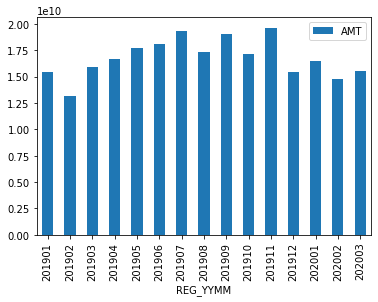

In [19]:
pd.pivot_table(sample_train, index= 'REG_YYMM', values ='AMT', aggfunc = "sum").plot(kind='bar')